# Fake News Classifier using Natural Language Processing

In [1]:
#Loading necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
#Reading the data
df=pd.read_csv('train.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#There are 20800 rows and 5 columns
df.shape

(20800, 5)

In [6]:
#Title contains the headline of the news
df['title']

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It            
1        FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                                      
2        Why the Truth Might Get You Fired                                                            
3        15 Civilians Killed In Single US Airstrike Have Been Identified                              
4        Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                     ...                                              
20795    Rapper T.I.: Trump a ’Poster Child For White Supremacy’                                      
20796    N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times                            
20797    Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times             
20798    NATO, Russia To Hold Parallel Exercises In Balkans              

In [7]:
#text contains the information regarding the headline.
df['text']

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was review

In [8]:
#There are 10413 'ones' and 10387 'zeroes' in the dataframe
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [9]:
#Finding Null values?
df.isnull().sum()

id        0   
title     558 
author    1957
text      39  
label     0   
dtype: int64

In [10]:
#The null values are removed using the dropna function
df=df.dropna()

In [11]:
#Null values now?
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
df.shape

(18285, 5)

In [13]:
#As we can see in the output, the Series. reset_index() function has reset the index of the given Series.
df.reset_index(inplace=True)

In [14]:
df.head()

index  ...  label
0  0      ...  1    
1  1      ...  0    
2  2      ...  1    
3  3      ...  1    
4  4      ...  1    

[5 rows x 6 columns]

In [15]:
import re
import string

## Text cleaning

In [16]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [17]:
df['text']

0        house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october      subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license   with apologies to keith olbermann  there is no doubt who the worst person in the world is this week fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server  the ranking democrats on the relevant committees didn t hear about it from comey  they found out via a tweet from one of the republican committee chairmen   as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was reviewing em

## Removing stop words and stemming the text

#### In natural language processing, useless words (data), are referred to as stop words. ... Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

#### The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

## Splitting the dataframe

In [21]:
Y=df['label']
X=df['text']

In [22]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [23]:
X.head(1)

0    house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october      subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license   with apologies to keith olbermann  there is no doubt who the worst person in the world is this week fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server  the ranking democrats on the relevant committees didn t hear about it from comey  they found out via a tweet from one of the republican committee chairmen   as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was reviewing emails

## Making train and test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
## We have split the data into 70 percent train and 30 percent test

### Tfidf vectorizer

Understanding TfidfVectorizer Using a Simple Example
The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.

In [25]:
#Applying tfidf to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [26]:
print(tfidf_test)

  (0, 116553)	0.03886548223169257
  (0, 115702)	0.02577799575708681
  (0, 115692)	0.00904800329154621
  (0, 114895)	0.009673419081344278
  (0, 114861)	0.016618616020114874
  (0, 114848)	0.010562420147987915
  (0, 113165)	0.013935134858730162
  (0, 113110)	0.016117563226566926
  (0, 113013)	0.027915866741656793
  (0, 112960)	0.0187879083094958
  (0, 112621)	0.014233357454810993
  (0, 112502)	0.033848840233184616
  (0, 112472)	0.018913078792303722
  (0, 111638)	0.022574963902960127
  (0, 111149)	0.03305268263185922
  (0, 110726)	0.030170078331103658
  (0, 110466)	0.011808060706868613
  (0, 110343)	0.03305268263185922
  (0, 110196)	0.017882582744640885
  (0, 108797)	0.0201639418741461
  (0, 107753)	0.0445860293134556
  (0, 107752)	0.0445860293134556
  (0, 107301)	0.026722385232109524
  (0, 106653)	0.04142088061358076
  (0, 106336)	0.015087881216580364
  :	:
  (5485, 14393)	0.030676892638861704
  (5485, 13981)	0.03850878930619704
  (5485, 13630)	0.05358526389326042
  (5485, 11899)	0.037197

In [27]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vect.get_feature_names()[-10:])

['zwrocie', 'zwrotu', 'zwyci', 'zxycmwjdxj', 'zyaratgah', 'zygankow', 'zylinderkopfdichtung', 'zynga', 'zytsov', 'zyuganov']


### Count vectorizer

Understanding CountVectorizer
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

In [28]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [29]:
print(count_test)

  (0, 57)	1
  (0, 807)	1
  (0, 1146)	1
  (0, 1150)	2
  (0, 1164)	1
  (0, 1812)	1
  (0, 1947)	1
  (0, 2541)	1
  (0, 2646)	1
  (0, 3505)	4
  (0, 3882)	2
  (0, 4948)	1
  (0, 5342)	1
  (0, 5768)	1
  (0, 6331)	1
  (0, 6941)	1
  (0, 6948)	1
  (0, 7269)	1
  (0, 8868)	1
  (0, 8874)	1
  (0, 8878)	3
  (0, 9309)	1
  (0, 9457)	9
  (0, 9503)	2
  (0, 9718)	1
  :	:
  (5485, 100570)	1
  (5485, 102087)	1
  (5485, 103139)	1
  (5485, 103332)	1
  (5485, 104069)	1
  (5485, 104142)	1
  (5485, 104480)	1
  (5485, 104552)	1
  (5485, 104782)	1
  (5485, 104912)	2
  (5485, 105867)	5
  (5485, 106262)	1
  (5485, 107691)	1
  (5485, 108797)	1
  (5485, 108839)	4
  (5485, 109772)	1
  (5485, 111259)	1
  (5485, 111530)	2
  (5485, 113165)	1
  (5485, 113823)	1
  (5485, 114711)	1
  (5485, 114723)	1
  (5485, 115134)	1
  (5485, 115692)	1
  (5485, 116007)	1


In [30]:
# Get the feature names of `count_vectorizer` 
print(count_vect.get_feature_names()[0:10])

['aa', 'aaa', 'aaah', 'aaahhh', 'aaajiao', 'aaany', 'aaas', 'aab', 'aabb', 'aac']


## Machine learning

# 1. Naive Bayes model

### TF-Idf vectorized 

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [33]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.772
[[3103    8]
 [1243 1132]]


In [34]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
1251 / 5486
Percentage accuracy:  77.19650018228216


In [35]:
## Plotting confusion matrix for TF-Idf vectorizer

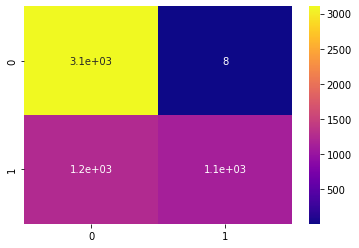

In [36]:
sns.heatmap(cm, cmap="plasma", annot=True)

### Count Vectorized

In [37]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.903
[[2977  134]
 [ 397 1978]]


In [38]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
531 / 5486
Percentage accuracy:  90.32081662413415


In [39]:
## Plotting confusion matrix for Count vectorizer.

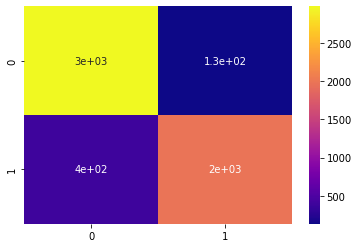

In [40]:
sns.heatmap(cm2, cmap="plasma", annot=True)

# 2. Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized

In [42]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9088589135982501
--------------------------------------------------
confusion_matrix train is:  [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3050   61]
 [ 439 1936]]
Wrong predictions out of total
--------------------------------------------------
500 / 5486
--------------------------------------------------


### Count Vectorized

In [43]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9026613197229311
--------------------------------------------------
confusion_matrix train is:  [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3032   79]
 [ 455 1920]]
Wrong predictions out of total
--------------------------------------------------
534 / 5486
--------------------------------------------------


# K-Nearest Neighbour

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.5187123994062036
Model accuracy on test is:  0.48651111921254103
--------------------------------------------------


In [46]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[1106 6144]
 [  16 5533]]
confusion_matrix test is:  [[ 304 2807]
 [  10 2365]]
Wrong predictions out of total
--------------------------------------------------
2817 / 5486
--------------------------------------------------


In [47]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.7850613329166342
Model accuracy on test is:  0.7320452059788553
--------------------------------------------------


In [48]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[4680 2570]
 [ 181 5368]]
confusion_matrix test is:  [[1770 1341]
 [ 129 2246]]
Wrong predictions out of total
--------------------------------------------------
1470 / 5486
--------------------------------------------------
